## Analysis of an E-commerce Dataset Part 3 (s2 2023)


In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the ratings have been converted to like (with score 1) and dislike (with score 0). Your task is to train classification models such as KNN to predict whether a user like or dislike an item.  


The header of the csv file is shown below.

| userId | timestamp | review | item | helpfulness | gender | category | item_id | item_price | user_city | rating |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the like (corresponding to rating 1) and dislike (corresponding to rating 0) in the data from some of the other fields. More specifically, you need to complete the following major steps:
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features.
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.
    

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv("/content/portfolio_3.csv")

In [9]:
#Q1. Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   helpfulness  2685 non-null   int64  
 5   gender       2685 non-null   object 
 6   category     2685 non-null   object 
 7   item_id      2685 non-null   int64  
 8   item_price   2685 non-null   float64
 9   user_city    2685 non-null   int64  
 10  rating       2685 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 230.9+ KB


In [10]:
data.head()

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
0,4081,71900,Not always McCrap,McDonald's,3,M,Restaurants & Gourmet,41,30.74,4,1
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,4,M,Restaurants & Gourmet,74,108.30,4,0
2,4081,72000,The Wonderful World of Wendy,Wendy's,4,M,Restaurants & Gourmet,84,69.00,4,1
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",3,M,Movies,68,143.11,4,1
4,4081,100399,Hey! Gimme some pie!,American Pie,3,M,Movies,6,117.89,4,0


In [11]:
data.isna().sum()
data.isnull().sum()
#No NA values are there.

userId         0
timestamp      0
review         0
item           0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
rating         0
dtype: int64

In [12]:
data.nunique()

userId          267
timestamp       844
review         2675
item             82
helpfulness       2
gender            2
category          9
item_id          82
item_price       77
user_city        40
rating            2
dtype: int64

Analysis-: There are 267 uniqe users across 40 cities #in 2685 entries of rating. There are 82 Unique items across the 9 Categories.
Categorical variable -: Helpfulness, Gender, Category,

In [13]:
Common_reviews  = data.review.value_counts()
Common_reviews[ Common_reviews > 1 ]

Being John Malkovich        3
The Matrix is awesome...    2
Dogma is no dog             2
Great movie!                2
brad's Experience           2
Hey Howdy Hey!!!            2
Southwest Airlines          2
The Sixth Sense (1999)      2
Funny Movie                 2
Name: review, dtype: int64

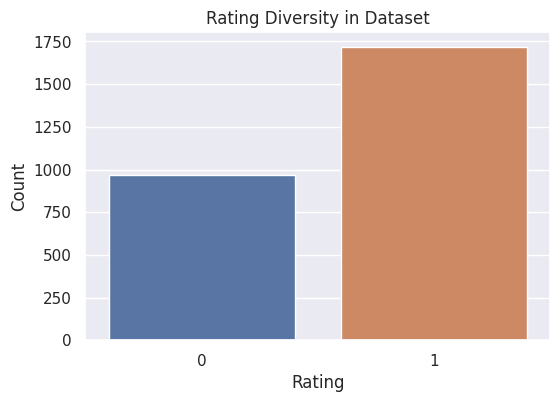

In [14]:
data.rating.value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.countplot(data = data, x = data.rating, label = "Counts of Rating")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Diversity in Dataset')


# Show the plot
plt.show()


In [15]:
#Preprocessing the Variables for using it in Linear Regression Model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


ord_enc = OrdinalEncoder()
data["category_code"] = ord_enc.fit_transform(data[["category"]])
print(data[["category", "category_code"]].head(5))
print("-----------------------------------------")

data["review_code"] = ord_enc.fit_transform(data[["review"]])
print(data[["review", "review_code"]].head(5))
print("-----------------------------------------")

data["gender_code"] = ord_enc.fit_transform(data[["gender"]])
print(data[["gender", "gender_code"]].head(5))
print("-----------------------------------------")


                category  category_code
0  Restaurants & Gourmet            8.0
1  Restaurants & Gourmet            8.0
2  Restaurants & Gourmet            8.0
3                 Movies            5.0
4                 Movies            5.0
-----------------------------------------
                                            review  review_code
0                                Not always McCrap       1618.0
1  I dropped the chalupa even before he told me to       1125.0
2                     The Wonderful World of Wendy       2185.0
3                             They actually did it       2243.0
4                             Hey! Gimme some pie!       1033.0
-----------------------------------------
  gender  gender_code
0      M          1.0
1      M          1.0
2      M          1.0
3      M          1.0
4      M          1.0
-----------------------------------------


In [16]:



#sns.set(style="ticks")
#sns.pairplot(data, kind="scatter", diag_kind="kde", hue = "rating", markers="o", height=2, aspect=1.5)
#plt.figure(figsize=(15,10))
#sns.heatmap(data= df.corr(), annot=True, cmap='viridis')

In [17]:
correlation = data[["userId","category_code","timestamp", "review_code", "item_id", "helpfulness","gender","item_price","user_city", "category_code","user_city"]].corr()
print(correlation)

                 userId  category_code  timestamp  review_code   item_id  \
userId         1.000000      -0.041362  -0.069176     0.007139 -0.005549   
category_code -0.041362       1.000000   0.015009     0.001970 -0.045268   
timestamp     -0.069176       0.015009   1.000000     0.007029 -0.004452   
review_code    0.007139       0.001970   0.007029     1.000000  0.163544   
item_id       -0.005549      -0.045268  -0.004452     0.163544  1.000000   
helpfulness   -0.166136      -0.013408   0.014179    -0.028259 -0.019882   
item_price     0.024576      -0.115571   0.010979    -0.041421 -0.054450   
user_city     -0.030031       0.008017  -0.014934     0.045626 -0.005576   
category_code -0.041362       1.000000   0.015009     0.001970 -0.045268   
user_city     -0.030031       0.008017  -0.014934     0.045626 -0.005576   

               helpfulness  item_price  user_city  category_code  user_city  
userId           -0.166136    0.024576  -0.030031      -0.041362  -0.030031  
categor

<ipython-input-17-4fcf18a9f0f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data[["userId","category_code","timestamp", "review_code", "item_id", "helpfulness","gender","item_price","user_city", "category_code","user_city"]].corr()


In [18]:

print(correlation.sort_values)

<bound method DataFrame.sort_values of                  userId  category_code  timestamp  review_code   item_id  \
userId         1.000000      -0.041362  -0.069176     0.007139 -0.005549   
category_code -0.041362       1.000000   0.015009     0.001970 -0.045268   
timestamp     -0.069176       0.015009   1.000000     0.007029 -0.004452   
review_code    0.007139       0.001970   0.007029     1.000000  0.163544   
item_id       -0.005549      -0.045268  -0.004452     0.163544  1.000000   
helpfulness   -0.166136      -0.013408   0.014179    -0.028259 -0.019882   
item_price     0.024576      -0.115571   0.010979    -0.041421 -0.054450   
user_city     -0.030031       0.008017  -0.014934     0.045626 -0.005576   
category_code -0.041362       1.000000   0.015009     0.001970 -0.045268   
user_city     -0.030031       0.008017  -0.014934     0.045626 -0.005576   

               helpfulness  item_price  user_city  category_code  user_city  
userId           -0.166136    0.024576  -0.030

In [19]:
data = data[["userId","category_code","timestamp", "review_code", "item_id", "helpfulness","gender","item_price","user_city", "category_code","user_city","rating"]]

In [20]:
#Sacling the vaariable for standardization

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

# Fit and transform the DataFrame
#scaled_data = scaler.fit_transform(ReadyData)

# Create a new DataFrame with standardized data
#scaled_df = pd.DataFrame(scaled_data, columns= ReadyData.columns)

# Print the standardized DataFrame
#scaled_df.head()

In [21]:
data.corr()

<ipython-input-21-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,userId,category_code,timestamp,review_code,item_id,helpfulness,item_price,user_city,category_code,user_city,rating
userId,1.000000,-0.041362,-0.069176,0.007139,-0.005549,-0.166136,0.024576,-0.030031,-0.041362,-0.030031,0.066444
category_code,-0.041362,1.000000,0.015009,0.001970,-0.045268,-0.013408,-0.115571,0.008017,1.000000,0.008017,-0.142479
timestamp,-0.069176,0.015009,1.000000,0.007029,-0.004452,0.014179,0.010979,-0.014934,0.015009,-0.014934,-0.009739
review_code,0.007139,0.001970,0.007029,1.000000,0.163544,-0.028259,-0.041421,0.045626,0.001970,0.045626,-0.041756
item_id,-0.005549,-0.045268,-0.004452,0.163544,1.000000,-0.019882,-0.054450,-0.005576,-0.045268,-0.005576,0.057107
helpfulness,-0.166136,-0.013408,0.014179,-0.028259,-0.019882,1.000000,0.004112,0.012086,-0.013408,0.012086,-0.010622
item_price,0.024576,-0.115571,0.010979,-0.041421,-0.054450,0.004112,1.000000,-0.023427,-0.115571,-0.023427,0.026062
user_city,-0.030031,0.008017,-0.014934,0.045626,-0.005576,0.012086,-0.023427,1.000000,0.008017,1.000000,-0.034866
category_code,-0.041362,1.000000,0.015009,0.001970,-0.045268,-0.013408,-0.115571,0.008017,1.000000,0.008017,-0.142479
user_city,-0.030031,0.008017,-0.014934,0.045626,-0.005576,0.012086,-0.023427,1.000000,0.008017,1.000000,-0.034866


In [29]:
from sklearn.model_selection import train_test_split

print(data.shape)
X =  data[["userId","category_code","timestamp", "review_code", "item_id", "helpfulness","item_price", "user_city"]]
y =  data["rating"]

#Case 1
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = data['rating'], test_size=0.2, random_state=42)
# Print the shapes of the resulting sets to verify
print("Case 1: X_train shape:", X_train.shape)
print("Case 1: X_test shape:", X_test.shape)
print("Case 1: y_train shape:", y_train.shape)
print("Case 1: y_test shape:", y_test.shape)


(2685, 12)
Case 1: X_train shape: (2148, 10)
Case 1: X_test shape: (537, 10)
Case 1: y_train shape: (2148,)
Case 1: y_test shape: (537,)


In [35]:
#Trainig the Logistic regression Model with all variables

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6405959031657356
Confusion Matrix:
 [[  9 184]
 [  9 335]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.05      0.09       193
           1       0.65      0.97      0.78       344

    accuracy                           0.64       537
   macro avg       0.57      0.51      0.43       537
weighted avg       0.59      0.64      0.53       537



In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


k_values = list(range(1, 21))  # You can adjust this range as needed

# Create a dictionary of hyperparameters to search through
param_grid = {'n_neighbors': k_values}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object to find the best K value using cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best K value from the cross-validation
best_k = grid_search.best_params_['n_neighbors']

# Get the best KNN model with the best K value
best_knn_model = grid_search.best_estimator_

# Evaluate the model on the test data
test_accuracy = best_knn_model.score(X_test, y_test)

# Print the best K value and test accuracy
print("Best K:", best_k)
print("Test Accuracy:", test_accuracy)

Best K: 13
Test Accuracy: 0.6201117318435754


In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


logistic_regression = LogisticRegression()

# Create an RFE selector with the logistic regression model
num_features_to_select = 3  # Adjust the number of features to select as needed
rfe_selector = RFE(logistic_regression, n_features_to_select = 3)

# Fit the RFE selector to the training data
rfe_selector.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe_selector.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

# Train a logistic regression model on the selected features
logistic_regression_selected = LogisticRegression(solver='liblinear')
logistic_regression_selected.fit(X_train[selected_features], y_train)

# Evaluate the model on the test data
accuracy = logistic_regression_selected.score(X_test[selected_features], y_test)
print("Test Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Features:
Index(['category_code', 'category_code', 'helpfulness'], dtype='object')
Test Accuracy: 0.6405959031657356
